In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, wilcoxon, ttest_rel

In [31]:
model_1_name = 'DenseNet169'
model_2_name = 'EnhancedCNN'
#model_2_name = 'SimpleCNN'
batch_size = 10
epochs = 50
k = 5

In [32]:
model1_results = pd.read_csv(f'results/{model_1_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
model2_results = pd.read_csv(f'results/{model_2_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')

C:\Users\PC\AppData\Local\Temp\ipykernel_9864\1242909017.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model1_results = pd.read_csv(f'results/{model_1_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')
C:\Users\PC\AppData\Local\Temp\ipykernel_9864\1242909017.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  model2_results = pd.read_csv(f'results/{model_2_name}_k{k}_epoch{epochs}_batch{batch_size}_val_results.txt', delimiter=', ')


In [33]:
model1_results.columns

Index(['Fold', 'Epoch', 'Average Val Loss', 'Val Acc', 'F1 Score', 'AUC'], dtype='object')

In [34]:
f1_model1 = model1_results['F1 Score']
auc_model1 = model1_results['AUC']
accuracy_model1 = model1_results['Val Acc']

f1_model2 = model2_results['F1 Score']
auc_model2 = model2_results['AUC']
accuracy_model2 = model2_results['Val Acc']

results_model1 = np.array([f1_model1, auc_model1, accuracy_model1])
results_model2 = np.array([f1_model2, auc_model2, accuracy_model2])

In [35]:
metrics = ['F1 Score', 'Val Acc', 'AUC']

In [36]:
for metric in metrics:
    print(f"Metric: {metric}")
    results_model1 = model1_results[metric]
    results_model2 = model2_results[metric]

    _, p_value = shapiro(results_model1 - results_model2)
    print("Shapiro-Wilk p-value:", p_value)
    is_normal = True
    if p_value < 0.05:
        is_normal = False

    if is_normal:
        # Perform t-test paired for normal distribution
        t_statistic, p_value_ttest = ttest_rel(results_model1, results_model2)
        print("T-Test p-values:", p_value_ttest)

        if np.asarray(p_value_ttest) < 0.05:
            print("There is a significant difference between the two approaches (p-value < 0.05)")
        else:
            print("There is no significant difference between the two approaches (p-value >= 0.05)")
    else:
        # Perform Wilcoxon test for non-normal distribution
        _, p_value_wilcoxon = wilcoxon(results_model1, results_model2)
        print("Wilcoxon p-values:", p_value_wilcoxon)

        if np.asarray(p_value_wilcoxon) < 0.05:
            print("There is a significant difference between the two approaches (p-value < 0.05)")
        else:
            print("There is no significant difference between the two approaches (p-value >= 0.05)")

Metric: F1 Score
Shapiro-Wilk p-value: 0.29484128952026367
T-Test p-values: 5.272104073546887e-44
There is a significant difference between the two approaches (p-value < 0.05)
Metric: Val Acc
Shapiro-Wilk p-value: 0.00011507323506521061
Wilcoxon p-values: 0.00014855445495346253
There is a significant difference between the two approaches (p-value < 0.05)
Metric: AUC
Shapiro-Wilk p-value: 7.301508048840333e-06
Wilcoxon p-values: 1.1573051649939442e-11
There is a significant difference between the two approaches (p-value < 0.05)


In [6]:
diff_f1 = f1_model1 - f1_model2
diff_auc = auc_model1 - auc_model2
diff_accuracy = accuracy_model1 - accuracy_model2

diff_data = np.array([diff_f1, diff_auc, diff_accuracy])

In [7]:
mean_diff_f1 = np.mean(diff_f1)
mean_diff_auc = np.mean(diff_auc)
mean_diff_accuracy = np.mean(diff_accuracy)

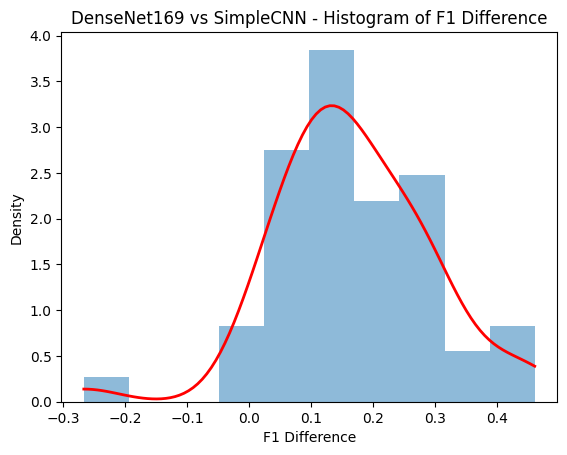

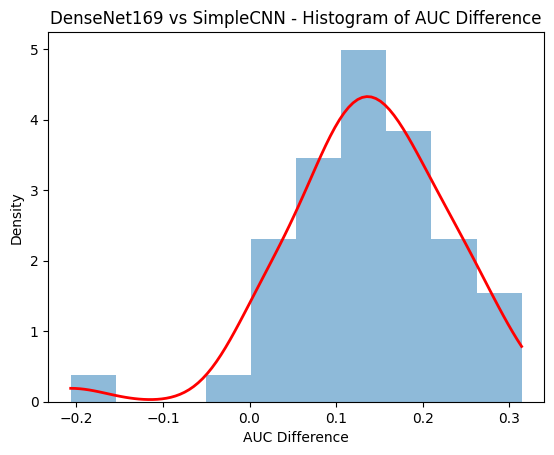

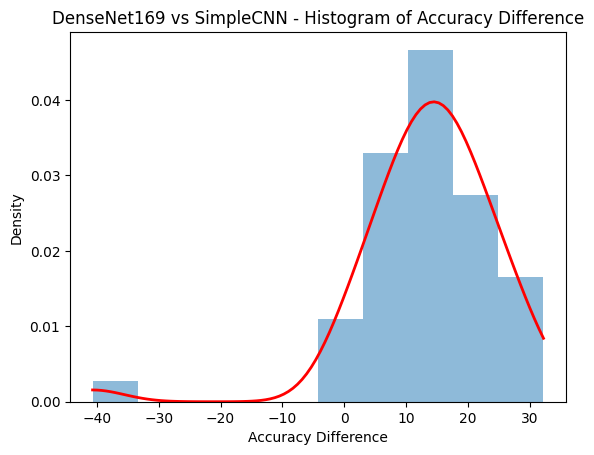

In [77]:
import scipy.stats as ss
# Generowanie histogramu dla różnicy F1
plt.hist(diff_f1, bins=10, alpha=0.5, density=True)
plt.xlabel('F1 Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of F1 Difference')

# Generowanie krzywej gęstości dla różnicy F1
x = np.linspace(min(diff_f1), max(diff_f1), 100)
density_f1 = ss.gaussian_kde(diff_f1)
plt.plot(x, density_f1(x), color='red', linewidth=2)

# Wyświetlanie histogramu z krzywą gęstości dla różnicy F1
plt.savefig(f'{model_1_name}_vs_{model_2_name}_F1_difference.svg')
plt.show()

# Analogicznie dla różnicy AUC
plt.hist(diff_auc, bins=10, alpha=0.5, density=True)
plt.xlabel('AUC Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of AUC Difference')

x = np.linspace(min(diff_auc), max(diff_auc), 100)
density_auc = ss.gaussian_kde(diff_auc)
plt.plot(x, density_auc(x), color='red', linewidth=2)
plt.savefig(f'{model_1_name}_vs_{model_2_name}_AUC_difference.svg')
plt.show()

# Analogicznie dla różnicy Accuracy
plt.hist(diff_accuracy, bins=10, alpha=0.5, density=True)
plt.xlabel('Accuracy Difference')
plt.ylabel('Density')
plt.title(f'{model_1_name} vs {model_2_name} - Histogram of Accuracy Difference')

x = np.linspace(min(diff_accuracy), max(diff_accuracy), 100)
density_accuracy = ss.gaussian_kde(diff_accuracy)
plt.plot(x, density_accuracy(x), color='red', linewidth=2)
plt.savefig(f'{model_1_name}_vs_{model_2_name}_ACC_difference.svg')
plt.show()

In [8]:
is_normal = True
for diff in diff_data:
    if len(diff) < 3:
        raise ValueError("Data must be at least length 3.")
    _, p_value = shapiro(diff)
    print("Shapiro-Wilk p-value:", p_value)
    if p_value < 0.05:
        is_normal = False

if is_normal:
    print("Difference distribution is normal.")
else:
    print("Difference distribution is not normal.")

#Pytanie: Czy dla wszystkich różnic musi być normalny?

Shapiro-Wilk p-value: 0.07037375867366791
Shapiro-Wilk p-value: 0.03479205071926117
Shapiro-Wilk p-value: 5.3516669140663e-06
Difference distribution is not normal.


In [79]:
if is_normal:
    #test t-paired dla różnic (dla rozkładu normalnego)
    t_statistic, p_value_ttest = ttest_rel(results_model1, results_model2)
    print("T-Test p-values:", p_value_ttest)

    if any(p < 0.05 for p in p_value_ttest):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")
else:
    #test Wilcoxona dla różnic (dla rozkładu nienormalnego)
    _, p_value_wilcoxon = wilcoxon(results_model1, results_model2)
    print("Wilcoxon p-values:", p_value_wilcoxon)

    if any(p < 0.05 for p in p_value_wilcoxon):
        print("There is a significant difference between the two models (p-value < 0.05)")
    else:
        print("There is no significant difference between the two models (p-value >= 0.05)")


Wilcoxon p-values: [0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.25       0.25       0.25
 0.25       0.25       0.25       0.17971249 0.25       0.25
 0.5        0.25       0.25       0.25       0.25       0.25
 0.25       0.25      ]
There is no significant difference between the two models (p-value >= 0.05)


c:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\env\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\PC\ML_Classification_Project\COVID-19-CT-Classification\env\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
